In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [4]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Divide dataset into independent and dependent features

X = dataset.iloc[:,3:13] #did not take RowNumber, CustomerId and Surname, starts from index 3 to 12 (but need to type 13 to take 12)
y = dataset.iloc[:,13] #take only index column 13 (last column)

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [20]:
## Feature Engineering - handling categorical features
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [22]:
# Drop Geography and Gender column
X=X.drop(['Geography','Gender'],axis=1)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [25]:
## Concatenate variables with dataframe
X = pd.concat([X,geography,gender],axis=1)

In [26]:
# Splitting that dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [29]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [31]:
X_train.shape

(8000, 11)

In [72]:
## Now let's create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [73]:
## Initialize ANN
classifier = Sequential()

In [74]:
## Add input layer - 11 independent features - 11 neurons
classifier.add(Dense(units=11,activation='relu')) #ReLU will get applied to the next layer

In [75]:
# Add first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [76]:
# Add second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [77]:
# Add output layer
classifier.add(Dense(1,activation='sigmoid')) # output is 1 neuron since it is a binary classification and activation is sigmoid

In [78]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [79]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
## Early Stopping - when accuracy of model is not increasing, it will automatically stop the training

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)


In [81]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7974 - loss: 0.4726 - val_accuracy: 0.7955 - val_loss: 0.4257
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8288 - loss: 0.3983 - val_accuracy: 0.8440 - val_loss: 0.4020
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8546 - loss: 0.3587 - val_accuracy: 0.8516 - val_loss: 0.3812
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8416 - loss: 0.3883 - val_accuracy: 0.8406 - val_loss: 0.4042
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8420 - loss: 0.3875 - val_accuracy: 0.8425 - val_loss: 0.3848
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8537 - loss: 0.3597 - val_accuracy: 0.8485 - val_loss: 0.3687
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8578 - loss: 0.3618 - val_accuracy: 0.8580 - val_loss: 0.3611
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8586 - loss: 0.3667 - 

In [82]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

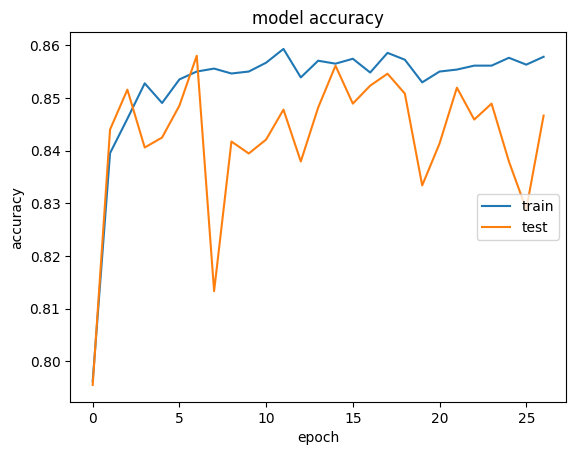

In [83]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='right')
plt.show()

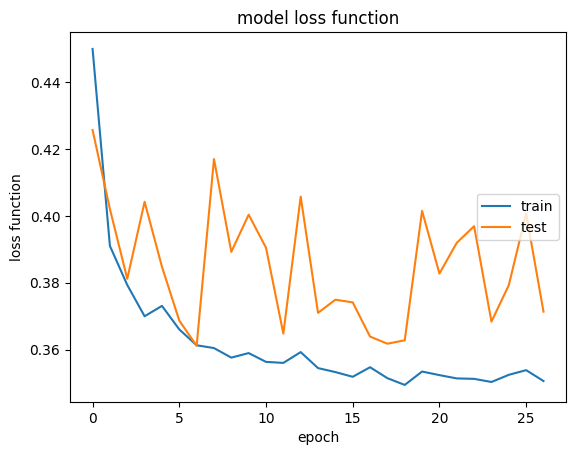

In [84]:
# summarize history for loss function
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='right')
plt.show()

In [85]:
# Make predictions and evaluate the model

#Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [86]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1504,   91],
       [ 188,  217]])

In [87]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [88]:
score

0.8605

In [89]:
## Get the weights
classifier.get_weights()

[array([[-0.13639745, -0.02958847,  0.38859078, -0.12893425,  0.34790838,
         -0.54802144, -0.07900004, -0.10769515, -0.12471278,  0.20337433,
         -0.06588306],
        [-0.20300575, -1.4646803 ,  0.24646656, -0.12894812, -1.1173093 ,
         -0.16808116,  0.07316303,  0.08864505,  0.6719531 , -0.43821472,
          1.311864  ],
        [-0.00699117,  0.01413774,  0.4777826 , -0.05368637, -0.2963859 ,
          0.12583682, -0.01463973, -0.13814552,  0.00829208, -0.20927879,
          0.17061995],
        [-0.33474016, -0.0165748 , -0.56417733,  0.1251861 , -0.13924457,
         -0.03297741, -1.3736641 ,  0.6244769 , -0.13800313, -0.22324944,
         -0.05968906],
        [ 0.21247917,  0.26054236,  0.1633699 ,  2.0052774 ,  0.3410803 ,
          0.53090143, -1.8218727 ,  1.939616  ,  0.4091361 , -0.03937056,
         -0.49605843],
        [ 0.2451868 , -0.05819926,  0.0780805 ,  0.00509995, -0.302391  ,
         -0.18798184,  0.03279825,  0.02456376,  0.0666611 ,  0.6994335